In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train_data.csv")

In [4]:
df.shape

(20952, 3)

In [5]:
df.head()

,posting_id,title,label_group
0,train_129225211,Paper Bag Victoria Secret,249114794
1,train_2278313361,PAPER BAG VICTORIA SECRET,249114794
2,train_2288590299,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_3803689425,Maling Ham Pork Luncheon Meat TTS 397gr,2395904891
4,train_2406599165,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20952 entries, 0 to 20951
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   20952 non-null  object
 1   title        20952 non-null  object
 2   label_group  20952 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 491.2+ KB


### Проверим наличие пропусков

In [7]:
df.isna().mean()

posting_id     0.0
title          0.0
label_group    0.0
dtype: float64

### Проверим дупликаты

In [8]:
df['posting_id'].unique().shape

(20952,)

### Посмотрим на столбец label_group

In [9]:
df['label_group'].unique().shape

(6608,)

In [10]:
df['label_group'].value_counts().mean()

3.1707021791767556

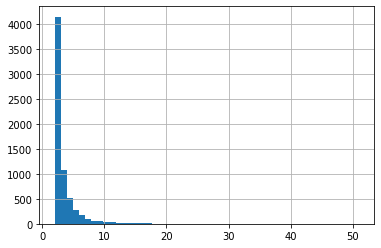

In [10]:
df['label_group'].value_counts().hist(bins=50, log=False);

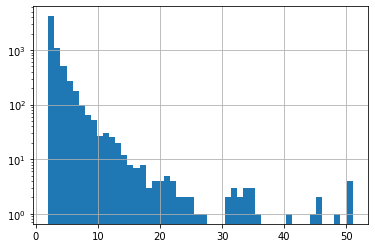

In [11]:
df['label_group'].value_counts().hist(bins=50, log=True);

<AxesSubplot:>

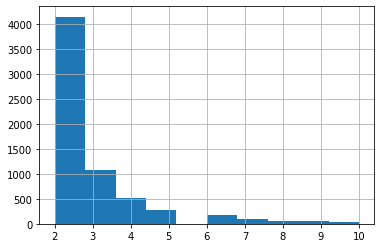

In [12]:
df['label_group'].value_counts()[df['label_group'].value_counts() <= 10].hist()

<AxesSubplot:>

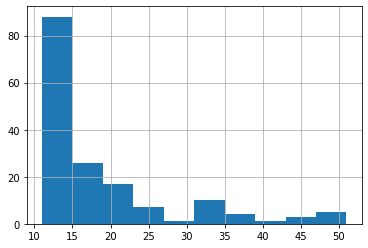

In [13]:
df['label_group'].value_counts()[df['label_group'].value_counts() > 10].hist()

### Посмотрим на столбец title

In [14]:
df["title"].str.len().mean()

56.44406261932035

<AxesSubplot:>

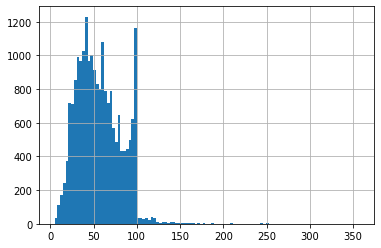

In [15]:
df["title"].str.len().hist(bins="scott")

In [16]:
df["title"][df["title"].str.len() < 100]

0                                Paper Bag Victoria Secret
1                                PAPER BAG VICTORIA SECRET
2              Maling TTS Canned Pork Luncheon Meat 397 gr
3                  Maling Ham Pork Luncheon Meat TTS 397gr
4        Daster Batik Lengan pendek - Motif Acak / Camp...
                               ...                        
20947    Sam A20 A30 A30S A50 A50S A51 A71 A70 A70s M10...
20948    LAMPU HURUF A-Z DAN ANGKA 0-9 \xe2\x9d\xa4\xef...
20949           LAMPU HURUF A-Z DAN ANGKA 0-9 TINGGI 16 CM
20950        Sprei Lady Rose 180x200 King terlaris Keroppi
20951         Sprei king ladyrose size 180x200 kerokeroppi
Name: title, Length: 20250, dtype: object

In [17]:
df["title"][df["title"].str.len() > 100]

171      Pumpup\xe2\x98\xaa GUJHUI HOT Puff SPONGE 1Pc ...
234      \xe2\x9d\xa4\xef\xb8\x8fTOKO SP\xe2\x9d\xa4\xe...
344      WBS \xe2\x9c\x85COD FREE BATERAI JAM TANGAN PR...
388      U19 Headset Macaron Mate Color HIFI Over Ear S...
403      \xe3\x80\x90CELEB\xe3\x80\x91U19 Headset Macar...
                               ...                        
20540    \xe2\x99\xa5LAPAS\xe2\x99\xa5 HG460 Tas Selemp...
20567    New Color VIOLET Silicone Casing Original Ipho...
20568    Violet Silicone Original Case Iphone SE2 11 IP...
20836    Tempered Glass IPhone 5 6 6s 7 8 Plus iphone X...
20899    \xe2\x97\x8f COD \xe2\x97\x8f KGO - FERANDA LE...
Name: title, Length: 338, dtype: object

In [18]:
df["title"][df["title"].str.len() > 100].str.encode("latin1").str.decode("utf-8")

171      Pumpup\xe2\x98\xaa GUJHUI HOT Puff SPONGE 1Pc ...
234      \xe2\x9d\xa4\xef\xb8\x8fTOKO SP\xe2\x9d\xa4\xe...
344      WBS \xe2\x9c\x85COD FREE BATERAI JAM TANGAN PR...
388      U19 Headset Macaron Mate Color HIFI Over Ear S...
403      \xe3\x80\x90CELEB\xe3\x80\x91U19 Headset Macar...
                               ...                        
20540    \xe2\x99\xa5LAPAS\xe2\x99\xa5 HG460 Tas Selemp...
20567    New Color VIOLET Silicone Casing Original Ipho...
20568    Violet Silicone Original Case Iphone SE2 11 IP...
20836    Tempered Glass IPhone 5 6 6s 7 8 Plus iphone X...
20899    \xe2\x97\x8f COD \xe2\x97\x8f KGO - FERANDA LE...
Name: title, Length: 338, dtype: object

In [19]:
"\xe2\x99\xa5LAPAS\xe2\x99\xa5".encode("latin1").decode("utf-8")

'♥LAPAS♥'

In [20]:
b"\xe2\x9c\x85COD FREE BATERAI JAM TANGAN".decode(encoding='utf-8')

'✅COD FREE BATERAI JAM TANGAN'

### Посмотрим на тестовые данные

In [21]:
test_df = pd.read_csv("test_data.csv")

In [22]:
test_df.shape

(13494, 2)

In [23]:
test_df["posting_id"].unique().shape

(13494,)

#### Проверим, пересекаются ли данные с обучающей выборкой

In [24]:
df["posting_id"].unique().shape[0] + test_df["posting_id"].unique().shape[0]

34446

In [25]:
concated_ids = pd.concat([test_df["posting_id"], df["posting_id"]])

In [26]:
concated_ids.shape

(34446,)

In [27]:
concated_ids.unique().shape

(26301,)

In [28]:
concated_ids.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20947     True
20948     True
20949     True
20950     True
20951     True
Name: posting_id, Length: 34446, dtype: bool

In [29]:
concated_ids.duplicated().sum()

8145

In [30]:
concated_ids.duplicated().sum() / concated_ids.shape[0] * 100

23.645706322940256

23.6% данных объектов имеют дупликаты в тренировочном наборе данных

In [31]:
merged = test_df.merge(df, on="posting_id", how="inner")
merged

,posting_id,title_x,title_y,label_group
0,train_129225211,Paper Bag Victoria Secret,Paper Bag Victoria Secret,249114794
1,train_2278313361,PAPER BAG VICTORIA SECRET,PAPER BAG VICTORIA SECRET,249114794
2,train_2288590299,Maling TTS Canned Pork Luncheon Meat 397 gr,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_3803689425,Maling Ham Pork Luncheon Meat TTS 397gr,Maling Ham Pork Luncheon Meat TTS 397gr,2395904891
4,train_2406599165,Daster Batik Lengan pendek - Motif Acak / Camp...,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
...,...,...,...,...
8140,train_1001474240,Sam A20 A30 A30S A50 A50S A51 A71 A70 A70s M10...,Sam A20 A30 A30S A50 A50S A51 A71 A70 A70s M10...,3574183172
8141,train_2244662893,LAMPU HURUF A-Z DAN ANGKA 0-9 \xe2\x9d\xa4\xef...,LAMPU HURUF A-Z DAN ANGKA 0-9 \xe2\x9d\xa4\xef...,763032672
8142,train_3281898016,LAMPU HURUF A-Z DAN ANGKA 0-9 TINGGI 16 CM,LAMPU HURUF A-Z DAN ANGKA 0-9 TINGGI 16 CM,763032672
8143,train_4221982820,Sprei Lady Rose 180x200 King terlaris Keroppi,Sprei Lady Rose 180x200 King terlaris Keroppi,53836859


In [32]:
merged.groupby("label_group")["posting_id"].agg("count").describe()

count    2653.000000
mean        3.070109
std         2.585707
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        46.000000
Name: posting_id, dtype: float64

### Попробуем визуализировать эмбеддинги

In [7]:
import re

import seaborn as sns
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.feature_extraction.text import TfidfVectorizer

import fasttext
import fasttext.util
fasttext.FastText.eprint = lambda x: None

from sentence_transformers import SentenceTransformer

import warnings
warnings.filterwarnings('ignore')

In [8]:
def remove_non_ascii_chars(string: str) -> str:
    return re.sub(r"\\[a-z0-9]{3}", "", string)

In [9]:
df["title_normalized"] = df["title"].apply(remove_non_ascii_chars)\
    .str.lower()\
    .str.replace(r"[^a-z0-9 ]", '', regex=True)\
    .str.replace(r" +", ' ', regex=True)

In [10]:
print(df["title"].iloc[234])
print(df["title_normalized"].iloc[234])

\xe2\x9d\xa4\xef\xb8\x8fTOKO SP\xe2\x9d\xa4\xef\xb8\x8f ACNOL LOTION 10ML / OBAT JERAWAT ACNOL / ACNOL LOTION FOR ACNE 10ML
toko sp acnol lotion 10ml obat jerawat acnol acnol lotion for acne 10ml


### Tf-Idf vectorization

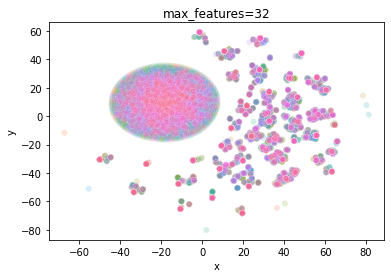

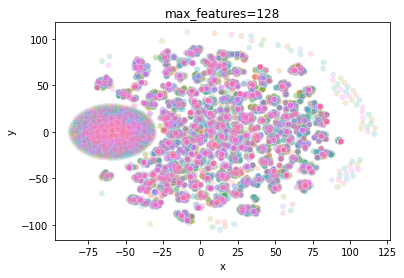

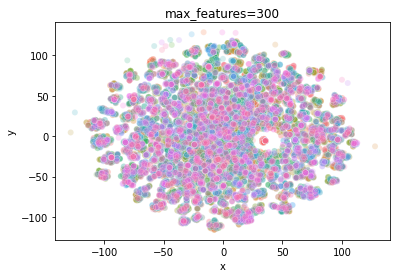

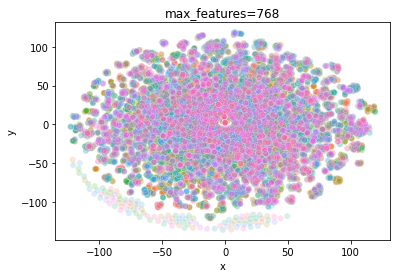

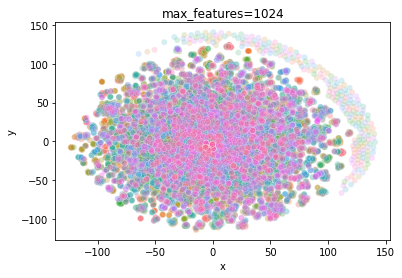

In [40]:
for max_features in [32, 128, 300, 768, 1024]:
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf = vectorizer.fit_transform(df["title_normalized"])
    df["embs"] = pd.Series(tfidf.todense().tolist())

    tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42, n_jobs=-1)
    tsne = tsne.fit_transform(np.vstack(df["embs"].values))
    df["x"] = pd.Series(tsne[:, 0])
    df["y"] = pd.Series(tsne[:, 1])

    sns.scatterplot(df["x"], df["y"], hue=df["label_group"].astype(str), legend=None, alpha=0.2)
    plt.title(f"{max_features=}")
    plt.show()

### fastText на английском

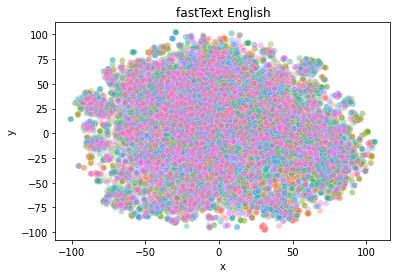

In [38]:
ft = fasttext.load_model('cc.en.300.bin')
df["embs"] = df["title_normalized"].apply(lambda x: ft.get_sentence_vector(x))

tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42, n_jobs=-1)
tsne = tsne.fit_transform(np.vstack(df["embs"].values))
df["x"] = pd.Series(tsne[:, 0])
df["y"] = pd.Series(tsne[:, 1])

sns.scatterplot(df["x"], df["y"], hue=df["label_group"].astype(str), legend=None, alpha=0.2)
plt.title(f"fastText English")
plt.show()

### fastText на индонезийском

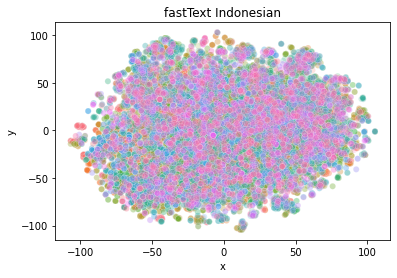

In [39]:
ft = fasttext.load_model('cc.en.300.bin')
df["embs"] = df["title_normalized"].apply(lambda x: ft.get_sentence_vector(x))

tsne = TSNE(n_components=2, init="pca", learning_rate="auto", random_state=42, n_jobs=-1)
tsne = tsne.fit_transform(np.vstack(df["embs"].values))
df["x"] = pd.Series(tsne[:, 0])
df["y"] = pd.Series(tsne[:, 1])

sns.scatterplot(df["x"], df["y"], hue=df["label_group"].astype(str), legend=None, alpha=0.2)
plt.title(f"fastText Indonesian")
plt.show()

### Sentence BERT

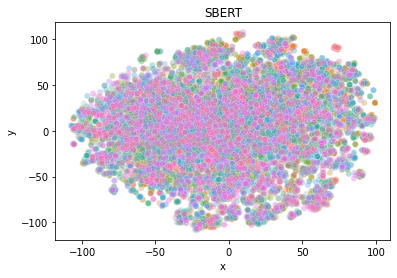

In [41]:
model = SentenceTransformer('all-MiniLM-L6-v2')
df["embs"] = df["title_normalized"].apply(lambda x: model.encode(x))
tsne = TSNE(n_components=2, init="pca", learning_rate="auto", random_state=42, n_jobs=-1)
tsne = tsne.fit_transform(np.vstack(df["embs"].values))
df["x"] = pd.Series(tsne[:, 0])
df["y"] = pd.Series(tsne[:, 1])

sns.scatterplot(df["x"], df["y"], hue=df["label_group"].astype(str), legend=None, alpha=0.2)
plt.title(f"SBERT")
plt.show()